 # TASK 1 :- Prediction using Supervised ML

## Predict the percentage of an student based on the no. of study hours.

## Simple Linear Regression

## What will be predicted score if a student studies for 9.25 hrs/ day?

#### Step 1: Importing Libraries needed to perform simple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import pickle

In [2]:
d={"s.no":[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24],
   "Hours":[2.5,5.1,3.2,8.5,3.5,1.5,9.2,5.5,8.3,2.7,7.7,5.9,4.5,3.3,1.1,8.9,2.5,1.9,6.9,7.4,2.7,4.8,3.8,6.9,7.8],
  "scores":[21,47,27,75,30,20,88,60,81,25,85,62,41,42,17,95,30,24,67,69,30,54,35,76,86]}


In [3]:
df=pd.DataFrame(d)

In [4]:
df

,s.no,Hours,scores
0,0,2.5,21
1,1,5.1,47
2,2,3.2,27
3,3,8.5,75
4,4,3.5,30
5,5,1.5,20
6,6,9.2,88
7,7,5.5,60
8,8,8.3,81
9,9,2.7,25


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   s.no    25 non-null     int64  
 1   Hours   25 non-null     float64
 2   scores  25 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 732.0 bytes


In [9]:
df.describe()

,s.no,Hours,scores
count,25.000000,25.000000,25.000000
mean,12.000000,5.044000,51.480000
std,7.359801,2.544451,25.286887
min,0.000000,1.100000,17.000000
25%,6.000000,2.700000,30.000000
50%,12.000000,4.800000,47.000000
75%,18.000000,7.400000,75.000000
max,24.000000,9.200000,95.000000


#### Step 2 : Data Visualization

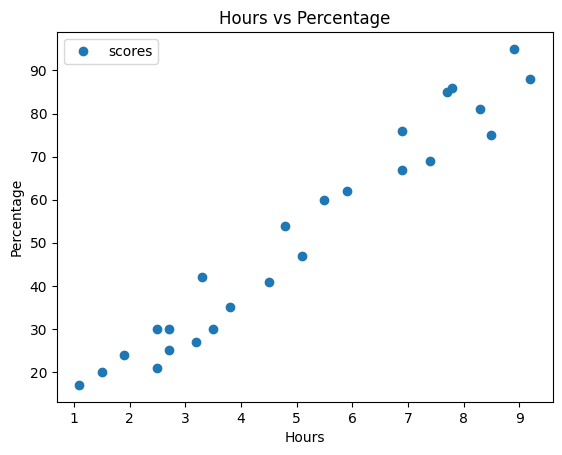

In [12]:
# Plotting the distribution of scores
df.plot(x='Hours', y='scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours')  
plt.ylabel('Percentage')  
plt.show()


The relation Matrix


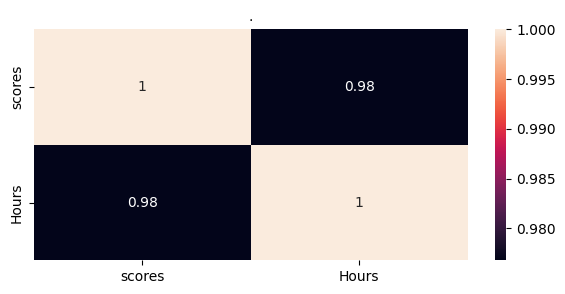

In [14]:
# Here the heatmap shows positive correlation between the Hours column and Scores column.
plt.figure(figsize=(7,3))
sns.heatmap(df[['scores','Hours']].corr(), annot = True)
plt.title('.', fontsize = 10)
print('The relation Matrix')
plt.show()

<Axes: xlabel='Hours'>

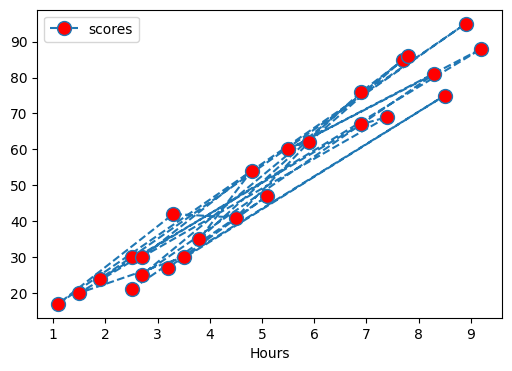

In [51]:
df.plot("Hours","scores",linestyle = "--",marker = "o",markersize = "10",markerfacecolor = "red", figsize=(6,4))

#### Step 3 : Preparing The Data

In [19]:
x = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

#### Step 4 : Algorithm Training

In [20]:
#defining training and testing sets ## we'll let the test size be equal to 0.1
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y, test_size=0.1)

In [21]:
best = 0
for _ in range(15):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y, test_size=0.2)

    linear = linear_model.LinearRegression()
    linear.fit(x_train, y_train) # fit this data  to get best fit line...
    acc = linear.score(x_test, y_test) # this will gona return the accuracy value of  out model
    #print("Accuracy: ",acc) #Change in Every Run best of data size, every time different data will be used...

    if acc > best:
        best = acc
        with open("student_model.pickle", "wb") as f: #opening student_model.pickle in write-binary mode as f to write
            pickle.dump(linear, f) #pickle saving the object into file
print(" Best Accuracy: ",best)

 Best Accuracy:  1.0


#### Step 5 :- Ploting the line of regression

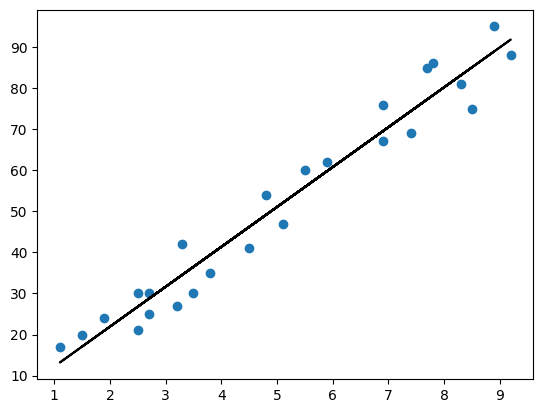

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Example data (replace this with your data)
x = np.array([2.5,5.1,3.2,8.5,3.5,1.5,9.2,5.5,8.3,2.7,7.7,5.9,4.5,3.3,1.1,8.9,2.5,1.9,6.9,7.4,2.7,4.8,3.8,6.9,7.8])
y = np.array([21,47,27,75,30,20,88,60,81,25,85,62,41,42,17,95,30,24,67,69,30,54,35,76,86])  # Replace with your actual y values

# Fit a linear regression model (assuming you have it)
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x.reshape(-1, 1), y)

# Compute the line based on the linear regression model
line = linear.coef_ * x + linear.intercept_

# Plotting for the valid data
plt.scatter(x, y)
plt.plot(x, line, color='black')
plt.show()


In [37]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

#### Step 6 :- Making Predictions

In [39]:
#Predicting the Test set results
y_pred = regressor.predict(x_test)
print(y_pred)

[5.9 8.5 8.9 3.2 3.8]


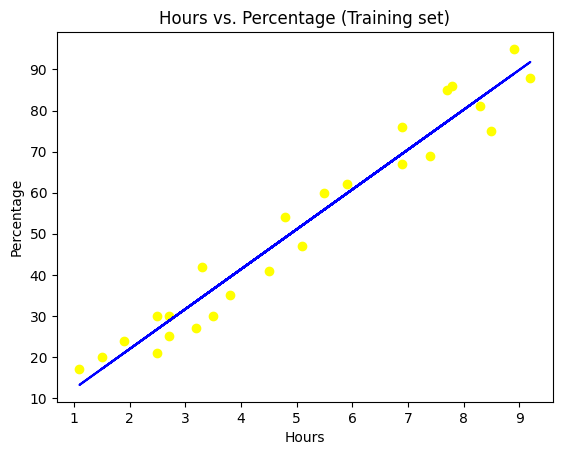

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Example data (replace this with your actual data)
x_train = np.array([2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5, 3.3, 1.1, 8.9, 2.5, 1.9, 6.9, 7.4, 2.7, 4.8, 3.8, 6.9, 7.8])
y_train = np.array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30, 24, 67, 69, 30, 54, 35, 76, 86])

# Create your regression model and fit it (you might have done this elsewhere in your code)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train.reshape(-1, 1), y_train)

# Plot the data and the regression line
plt.scatter(x_train, y_train, color='yellow')
plt.plot(x_train, regressor.predict(x_train.reshape(-1, 1)), color='blue')
plt.title('Hours vs. Percentage (Training set)')
plt.xlabel('Hours')
plt.ylabel('Percentage')
plt.show()


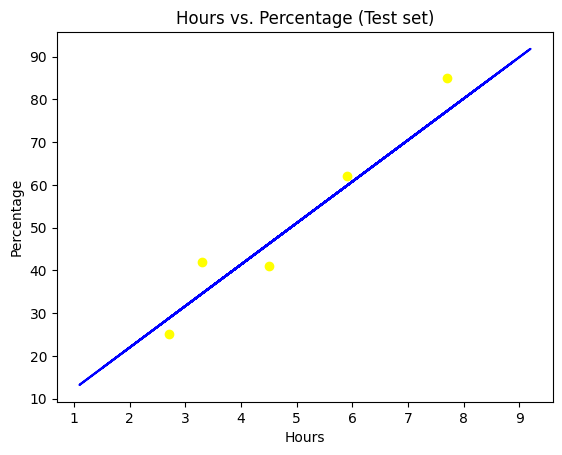

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Example data (replace this with your actual data)
x_test = np.array([2.7, 7.7, 5.9, 4.5, 3.3])  # Replace with your actual x_test data
y_test = np.array([25, 85, 62, 41, 42])      # Replace with your actual y_test data

# Assuming you already have a trained regressor model (e.g., `regressor`) from your previous code

# Plot the test data and the regression line
plt.scatter(x_test, y_test, color='yellow')
plt.plot(x_train, regressor.predict(x_train.reshape(-1, 1)), color='blue')  # Use the same regressor as before
plt.title('Hours vs. Percentage (Test set)')
plt.xlabel('Hours')
plt.ylabel('Percentage')
plt.show()


In [47]:
#Comparing the actual values with the predicted ones.
dataset = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
dataset

,Actual,Predicted
0,25,5.9
1,85,8.5
2,62,8.9
3,41,3.2
4,42,3.8


#### Step 7 : Predicting the output on the custom/New Data.

In [48]:
#predicting the score 
dataset = np.array(9.25)
dataset = dataset.reshape(-1, 1)
pred = regressor.predict(dataset)
print("If the student studies for 9.25 hours/day, the score is {}.".format(pred))

If the student studies for 9.25 hours/day, the score is [92.30988354].


#### Step 8 : Evaluating the model

In [52]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
print('Root mean squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

Mean Absolute Error: 44.94
Mean Squared Error: 2384.95
Root mean squared Error: 48.83594987301875


#### Step 9 : Conclusion

##### We used a Linear Regression Model to predict the score of a student if he/she studies for 9.25 hours/day and the Predicted Score came out to be 92.31.